In [20]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integ
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from Rods3D import F1
from Rods3D import F1_1D
from Rods3D import F1_1D_V
from Rods3D import Get_n_min_s
from Rods3D import Get_P_s
from Rods3D import Get_P_s_V
from Rods3D import G_s

Consider a container of volume V with N rod-shaped particles. Each of these rods can
change its orientation. For reasons of simplicity limit the possible rod orientations to one
of the coordinate axes, x, y or z. Denote the number of rods oriented along the x-direction
as Nx, etc. and the total number of rods N = Nx + Ny + Nz. The temperature of the
container is kept constant equal to T. We have absorbed the Boltzmann constant into T
so that it has dimensions energy. 

Now start at a very low rod concentration n = N/V and add rods (increase N, keep
V constant) at a very slow constant rate, so slow that you may always consider the system
to be in equilibrium. T is kept constant.

In [10]:
#minimizz 3D
N = 100
V = 10
Ns_0 = np.array([30, 30, 30])
Lin_constr = LinearConstraint([1, 1, 1], [N], [N])
res = minimize(F1, Ns_0, args=(V), constraints=Lin_constr)
print("[N_x, N_y, N_z] =")
res.x/N

[N_x, N_y, N_z] =


array([0.33333333, 0.33333333, 0.33333333])

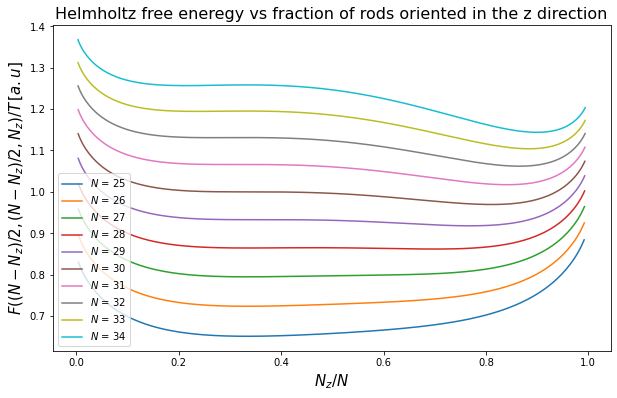

In [11]:
plt.figure(figsize=(10,6))
Ns = np.arange(25, 35, 1)
for N in Ns:
    step = 0.1
    Nx = np.arange(step, N-step, step)
    Fs = F1_1D(Nx, N, 10)
    plt.plot(Nx/N, Fs/N, label='$N$ = '+str(N))
plt.xlabel("$N_z/N$", size=15)
plt.ylabel("$F((N-N_z)/2, (N-N_z)/2, N_z)/T\,[a.u]$", size = 15)
plt.title("Helmholtz free eneregy vs fraction of rods oriented in the z direction", size = 16)
plt.legend()
plt.savefig("FvsNz.pdf")

C:\Users\Leo\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


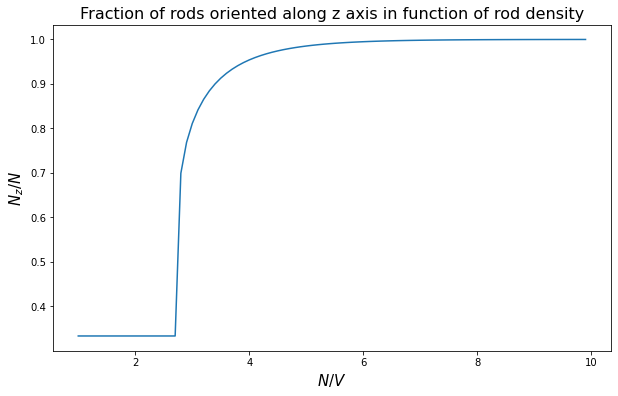

In [12]:
V = 10
plt.figure(figsize=(10,6))
N_s = np.arange(10, 100, 1)
n_x_s = Get_n_min_s(N_s, V)
plt.plot(N_s/V, n_x_s)
plt.xlabel("$N/V$", size=15)
plt.ylabel("$N_z / N$", size = 15)
plt.title("Fraction of rods oriented along z axis in function of rod density", size = 16)
plt.savefig("N_zvsn.pdf")

Now consider this system at constant N and T and increase the pressure P by very slowly
squeezing harder and harder on the (soft) container. Assume again that the system is
always in equilibrium. V is no longer constant.

In [13]:
V = 10
Ps = Get_P_s(N_s, V)

C:\Users\Leo\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


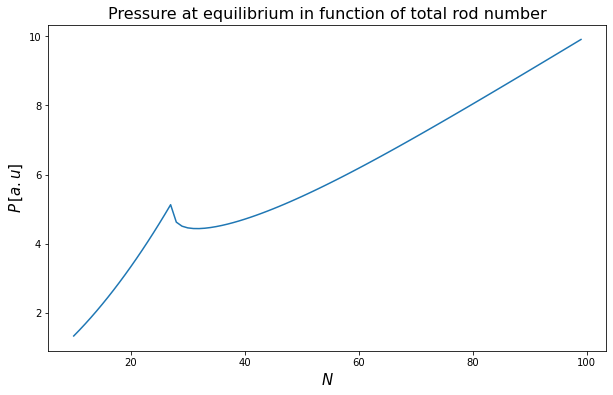

In [14]:
plt.figure(figsize=(10,6))
plt.plot(N_s, Ps)
plt.xlabel("$N$", size=15)
plt.ylabel("$P\,[a.u]$", size = 15)
plt.title("Pressure at equilibrium in function of total rod number", size = 16)
plt.savefig("P-N.pdf")

$G = \int V dP$

We work at a very low fixed N (N = 10) and constant T.

In [15]:
N = 100
V_s = np.arange(10, 100, 1)
P_s = np.array(Get_P_s_V(V_s, N))

C:\Users\Leo\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


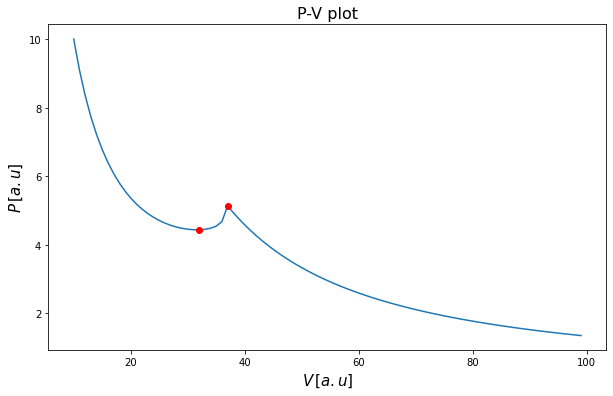

In [16]:
plt.figure(figsize=(10,6))
plt.plot(V_s, P_s)
plt.xlabel("$V\,[a.u]$", size=15)
plt.ylabel("$P\,[a.u]$", size = 15)
plt.title("P-V plot", size = 16)

#Let's find the coordinates of the local max and min of P:
ind_min = np.argmin(P_s[V_s<40])
ind_max = np.argmax(P_s[V_s>30])

P_min, P_max = P_s[ind_min], P_s[V_s>30][ind_max]
V_Pmin, V_Pmax = V_s[ind_min], V_s[V_s>30][ind_max]
plt.plot(V_Pmin, P_min, 'bo', c='r')
plt.plot(V_Pmax, P_max, 'bo', c='r')

plt.savefig("P-V.pdf")

In [17]:
#We split now the G curve in three branches, in order to make it integrable.
P_s1 = np.flip(P_s[V_s>=V_Pmax])
V_s1 = np.flip(V_s[V_s>=V_Pmax])

P_s2 = P_s[(V_s<=V_Pmax)&(V_s>=V_Pmin)]
V_s2 = V_s[(V_s<=V_Pmax)&(V_s>=V_Pmin)]

P_s3 = np.flip(P_s[V_s<=V_Pmin])
V_s3 = np.flip(V_s[V_s<=V_Pmin])

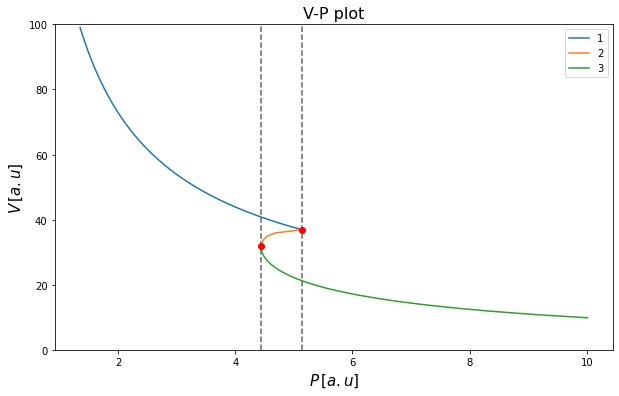

In [18]:
plt.figure(figsize=(10,6))
plt.xlabel("$P\,[a.u]$", size=15)
plt.ylabel("$V\,[a.u]$", size = 15)
plt.title("V-P plot", size = 16)

plt.plot(P_s1, V_s1, label='1')
plt.plot(P_s2, V_s2, label='2')
plt.plot(P_s3, V_s3, label='3')
plt.legend()

plt.plot(P_min, V_Pmin, 'bo', c='r')
plt.plot(P_max, V_Pmax, 'bo', c='r')
plt.ylim(0,100)
plt.vlines([P_min, P_max], 0, 100, color='black', alpha=0.6, linestyles='dashed')

plt.savefig('V-P.pdf')

In [21]:
G_s1 = G_s(P_s1, V_s1)
aux = G_s(P_s2, V_s2)
G_s2 = G_s1[-1] - aux[-1] + np.flip(aux) 
G_s3 = G_s2[-1] + G_s(P_s3, V_s3)

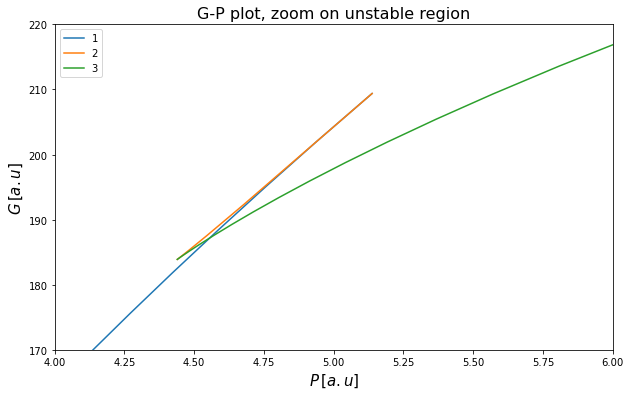

In [22]:
plt.figure(figsize=(10,6))
plt.plot(P_s1, G_s1, label='1')
plt.plot(np.flip(P_s2), G_s2, label='2')
plt.plot(P_s3, G_s3, label='3')
plt.legend()
plt.xlabel("$P\,[a.u]$", size=15)
plt.ylabel("$G\,[a.u]$", size = 15)
plt.title("G-P plot", size = 16)
plt.savefig("G-P.pdf")
plt.xlim(4, 6)
plt.ylim(170, 220)
plt.title("G-P plot, zoom on unstable region", size = 16)
plt.savefig("G-P_zoom.pdf")